# Basic checklist :

## I) Sampling :

###   1) UnderSampling :
####       * Description of UnderSampling technique (See Readme)
####       * Implementation .
####       
###    2) OverSampling :
####       * Description of OverSampling technique. (See Readme)
####       * Implementation and code snippet.
####       
###    3) Conclusion :
####       * Summary of the sampling techniques and their impact on model performance. (See Readme)
       
## II) Multi-Model Approach:

###    1) Decision Tree Classifier
####       * Description of the Decision Tree Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Decision Tree Classifier.
###    2) Random Forest Classifier
####       *Description of the Random Forest Classifier algorithm. (See Readme)  
####       *Implementation .
####       *Evaluation of the Random Forest Classifier.
###    3) Gradient Boosting Classifier
####       * Description of the Gradient Boosting Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Gradient Boosting Classifier.
###    4) Support Vector Classifier (SVC)
####       * Description of the Support Vector Classifier algorithm. (See Readme)
####       * Implementation .
####       * Evaluation of the Support Vector Classifier.

## III) Model Comparison:

###    1) Visual comparison of model performance metrics.
###    2) Final recommendation for model selection.

In [1]:
# import libraries : 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tools import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, validation_curve
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.svm import SVC 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
import os

from sklearn.svm import SVC

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
current_dir = os.getcwd()

parent_dir = os.path.dirname(current_dir)
parent_dir
string=parent_dir+'//features_engineerd//Service_Score.csv'

df=pd.read_csv(string)

X = df.drop('Service_score', axis = 1)
y = df['Service_score']
scaled=StandardScaler()
X_scaled=scaled.fit_transform(X.to_numpy())
df.head()

,Claim Settlement Time,Claim Approval Rate,Claims Handling Process,Service_score
0,19.32,98.45,0,0
1,14.22,86.24,2,1
2,29.53,94.47,0,0
3,23.75,97.16,1,0
4,21.25,93.39,1,0


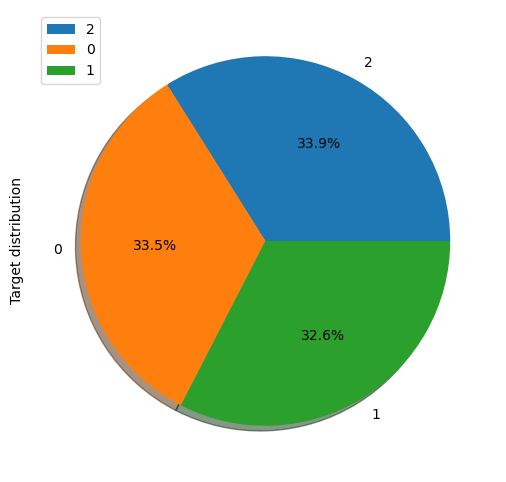

In [3]:
show_cluster_distrid(df,'Service_score')

# I) Sampling

## 1) Undersampling

In [4]:
print(Counter(y))

undersample = RandomUnderSampler()
undersampled_X, undersampled_y = undersample.fit_resample(X_scaled, y.to_numpy())
print(Counter(undersampled_y))

undersampled_X=pd.DataFrame(undersampled_X,columns=df.drop('Service_score', axis = 1).columns)
undersampled_y=pd.DataFrame(undersampled_y,columns=['Service_score'])


Counter({2: 3393, 0: 3351, 1: 3256})
Counter({0: 3256, 1: 3256, 2: 3256})


## 2) OverSampling

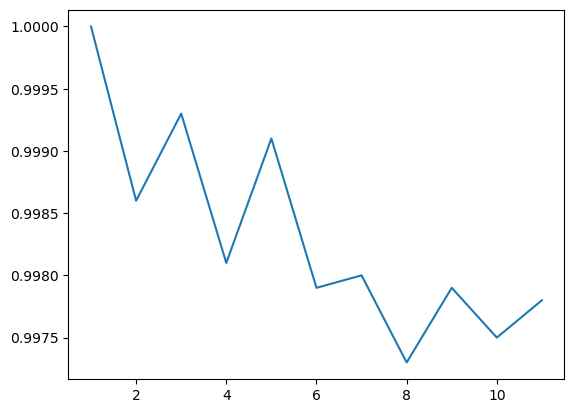

In [5]:
Knn_nighbert_params(X_scaled,y,12)

In [6]:

smote = SMOTE(sampling_strategy='auto',k_neighbors=1)
print(Counter(y))

oversampling_X, oversampling_y = smote.fit_resample(X,y)

print(Counter(oversampling_y))
oversampling_X=pd.DataFrame(oversampling_X,columns=df.drop('Service_score', axis = 1).columns)
oversampling_y=pd.DataFrame(oversampling_y,columns=['Service_score'])


Counter({2: 3393, 0: 3351, 1: 3256})
Counter({0: 3393, 1: 3393, 2: 3393})


## 3) Conclusion

* the distribution of the target classes is relatively balanced, undersampling using RandomUnderSampler might be a safer choice to avoid potential overfitting that could occur with SMOTE . 

In [7]:
liste_models_metrics=dict()

In [8]:
X_sampled,y_sampled=undersampled_X,undersampled_y

## II) Multi-Model Approach:

### 1) Decision Tree Classifier

{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'min_samples_split': range(2, 11), 'min_samples_leaf': range(1, 11), 'max_features': ['sqrt', 'log2', None]}


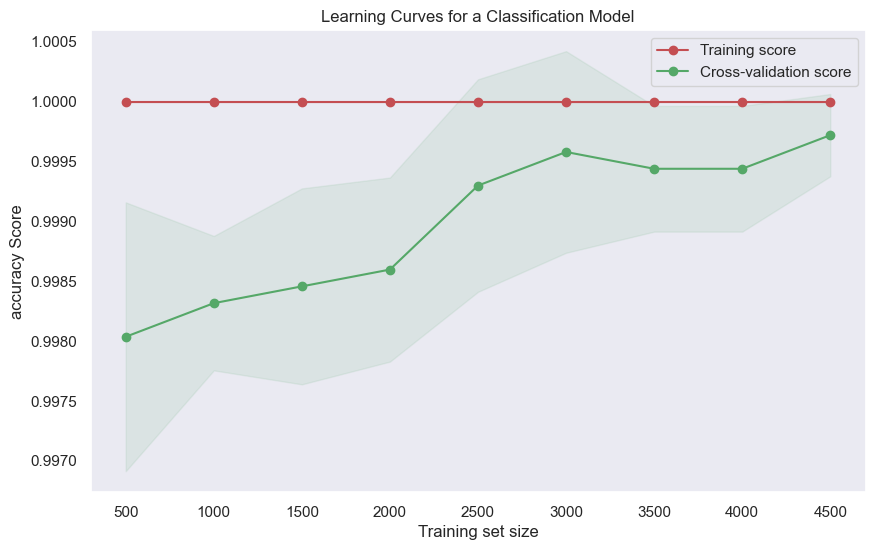

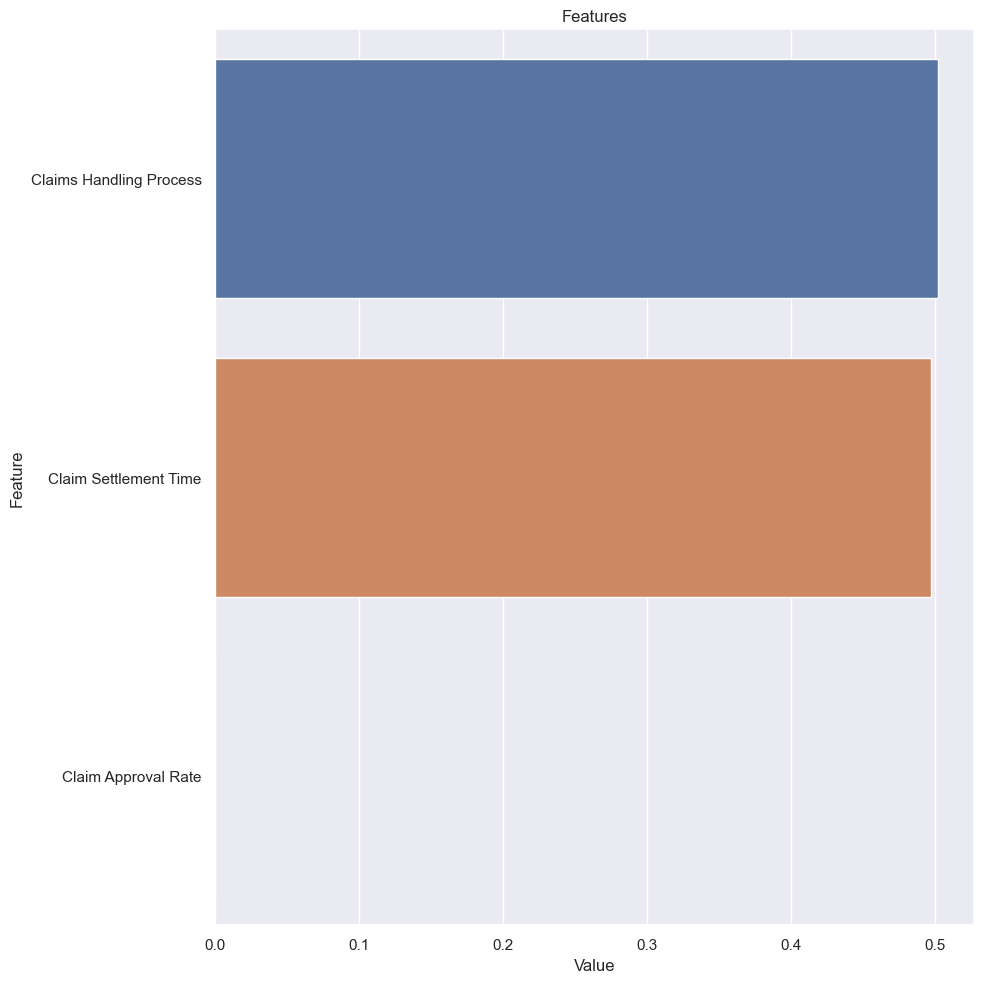

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725594006276, 'Precision': 0.9996728784786464, 'Recall': 0.9996725605762934, 'confusion_matrix': array([[1029,    0,    0],
       [   0, 1010,    0],
       [   1,    0, 1014]], dtype=int64)}


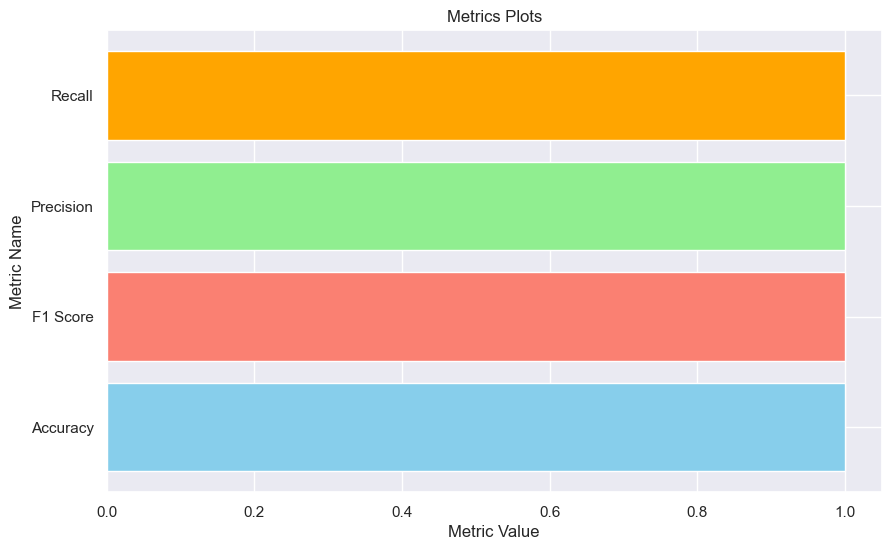

                    /*************************************\                   


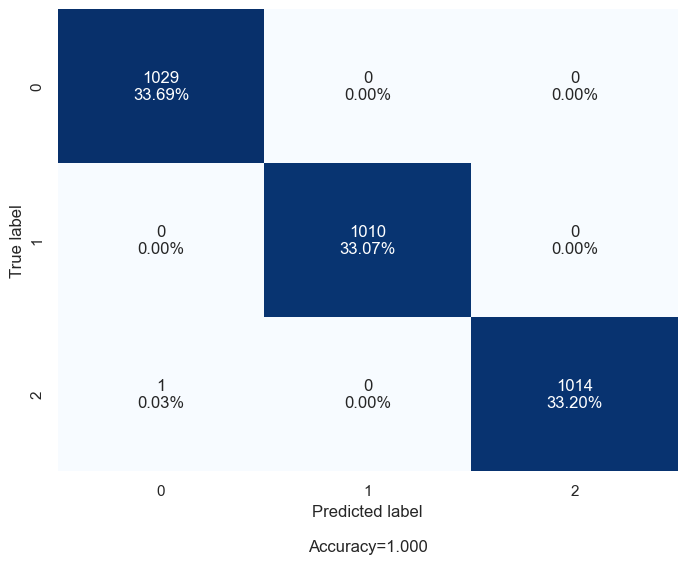

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 42, 'criterion': 'gini'}


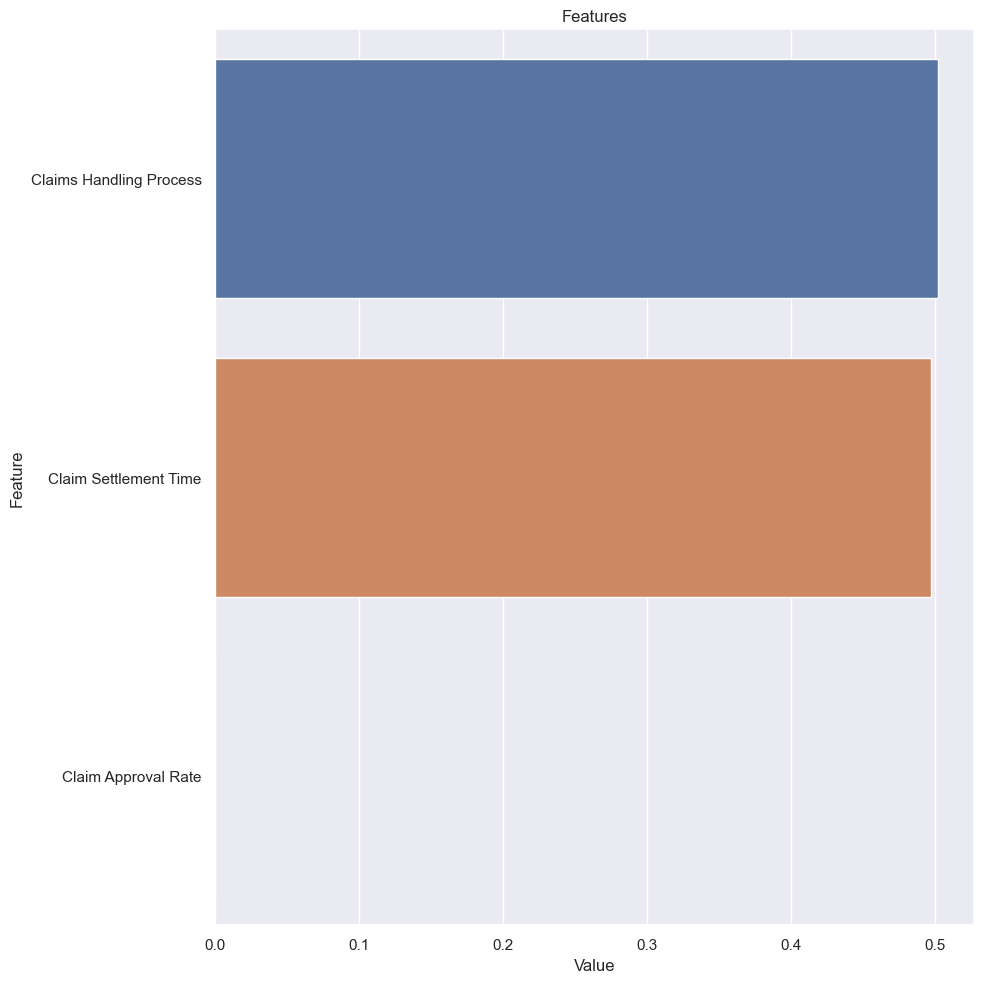

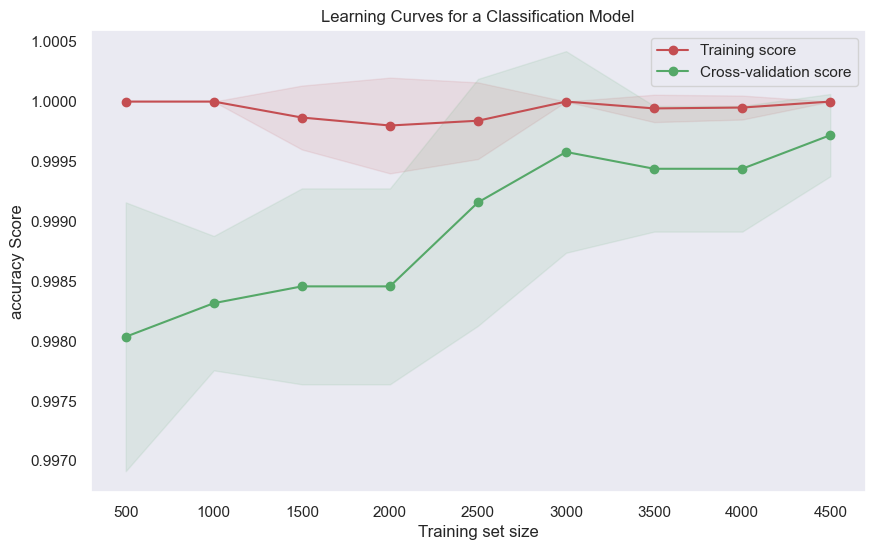

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725594006276, 'Precision': 0.9996728784786464, 'Recall': 0.9996725605762934, 'confusion_matrix': array([[1029,    0,    0],
       [   0, 1010,    0],
       [   1,    0, 1014]], dtype=int64)}


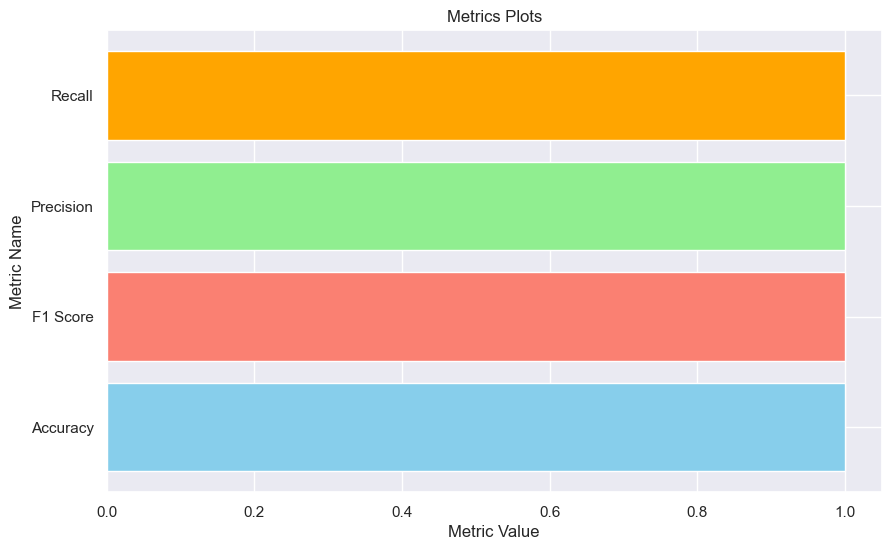

                    /*************************************\                   


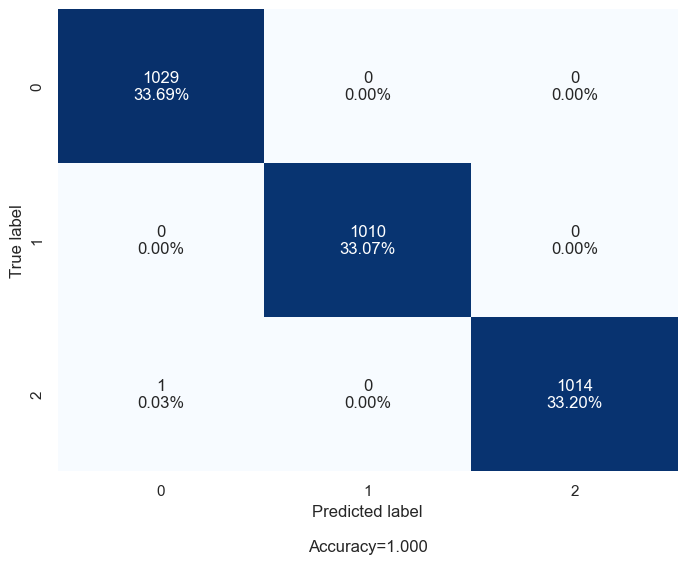

                    /*************************************\                   
                    /*************************************



In [16]:
random_grid  = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

print(random_grid)
best_params=modeling(DecisionTreeClassifier,X_sampled,y_sampled,random_grid)

{'Accuracy': 1.0, 'F1 Score': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'confusion_matrix': array([[1032,    0,    0],
       [   0, 1016,    0],
       [   0,    0, 1006]], dtype=int64)}


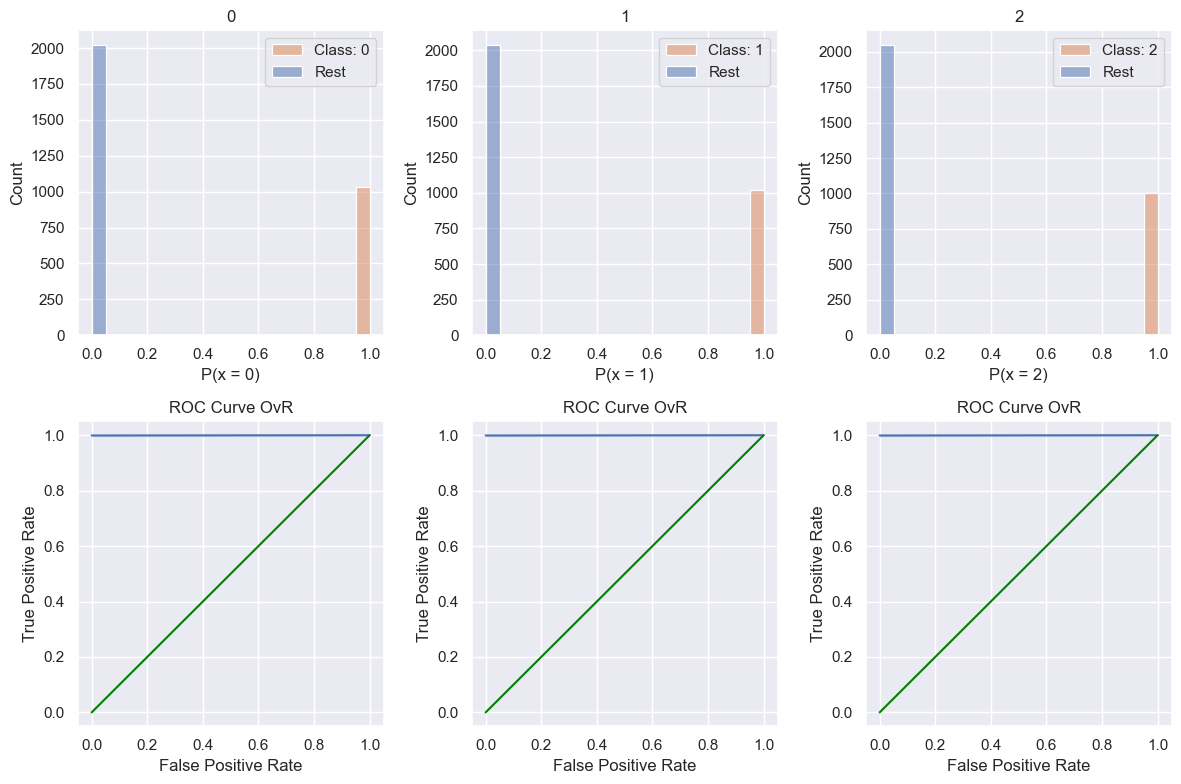

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=DecisionTreeClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
print(get_metrics(y_pred,y_test))
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Service_score')

In [18]:
# Add the Best Decisiontree model into a Model_list for the Final comparison
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'DecisionTree' not in liste_models_metrics.keys():
    liste_models_metrics['DecisionTree']=metric_dic

{'Accuracy': 1.0, 'F1 Score': 1.0, 'Precision': 1.0, 'Recall': 1.0}


.




.











### 2) Random Forest Classifier

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


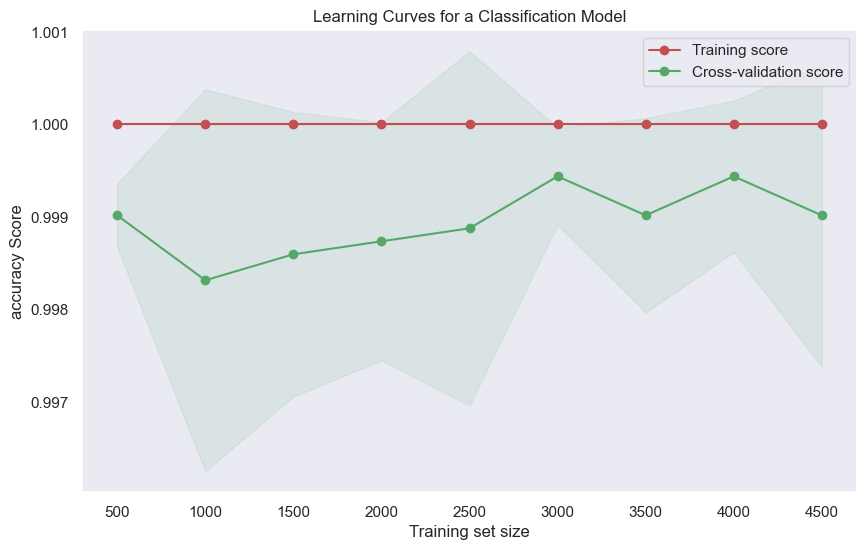

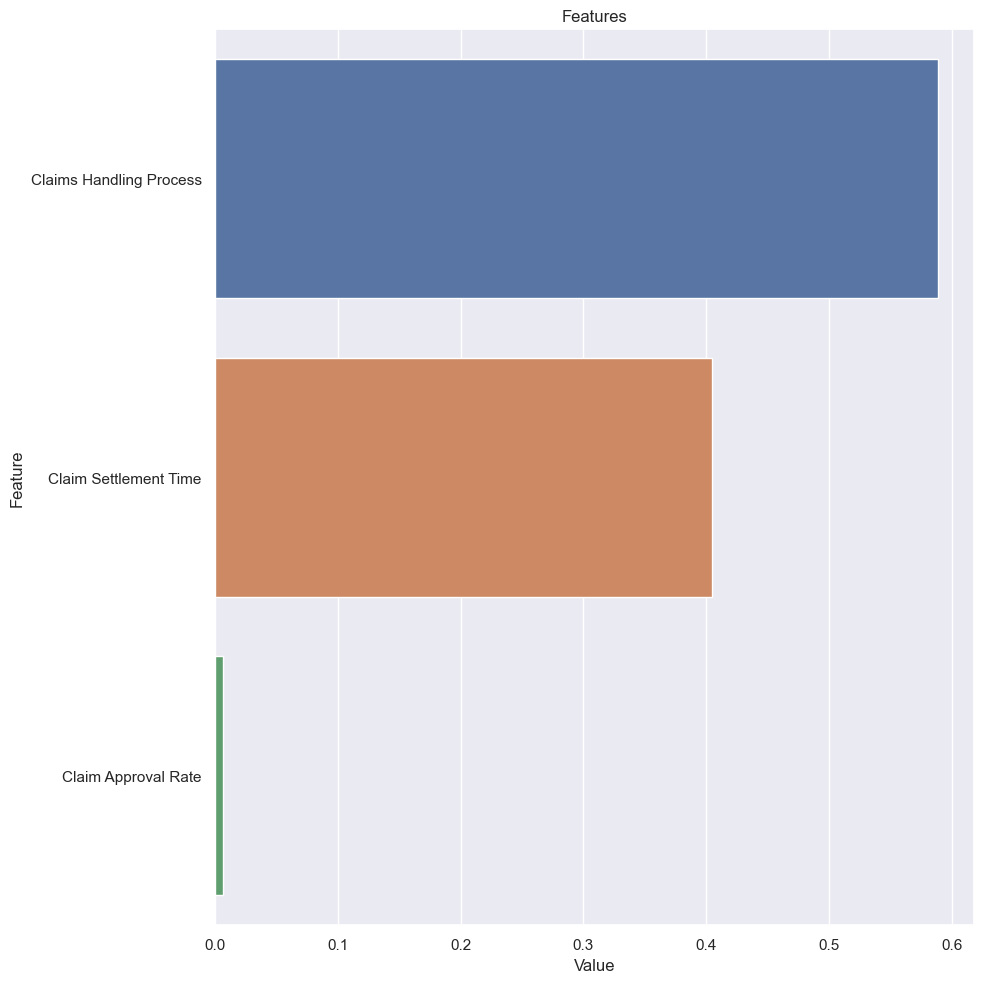

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725596512311, 'Precision': 0.9996728763327289, 'Recall': 0.9996725605762934, 'confusion_matrix': array([[1036,    0,    0],
       [   0,  993,    0],
       [   1,    0, 1024]], dtype=int64)}


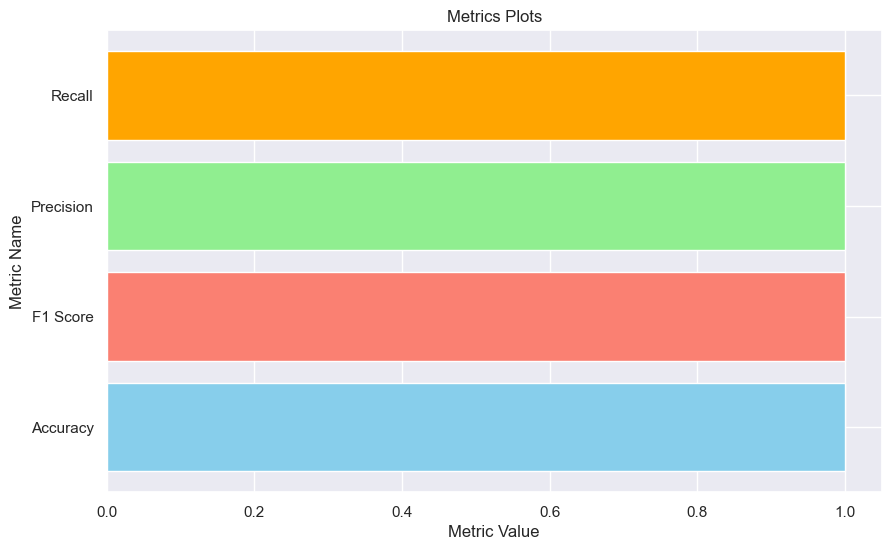

                    /*************************************\                   


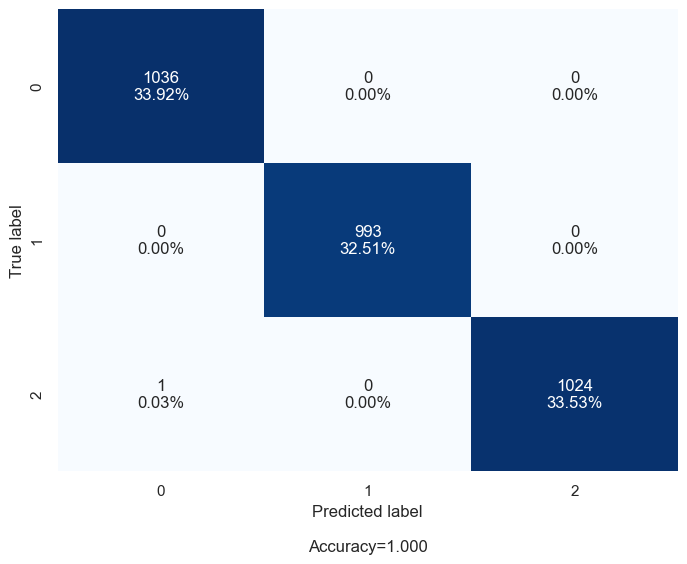

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'criterion': 'entropy'}


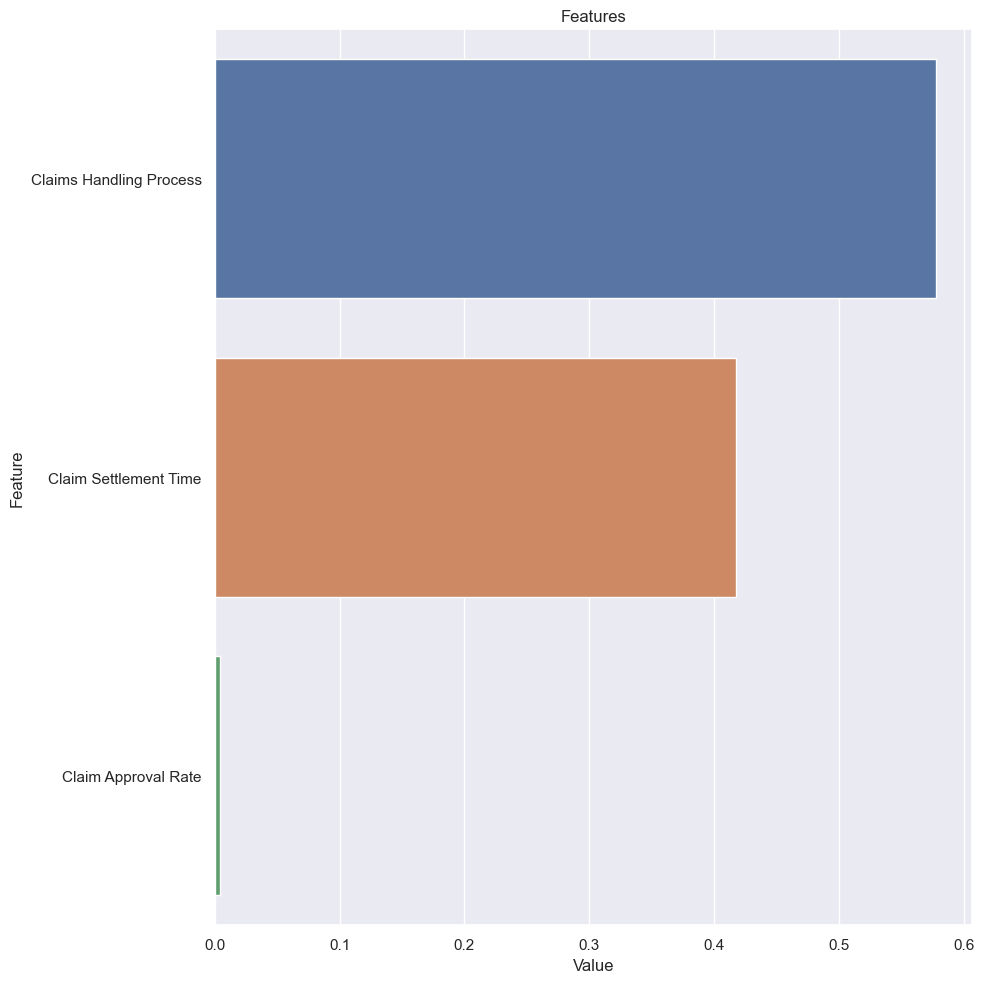

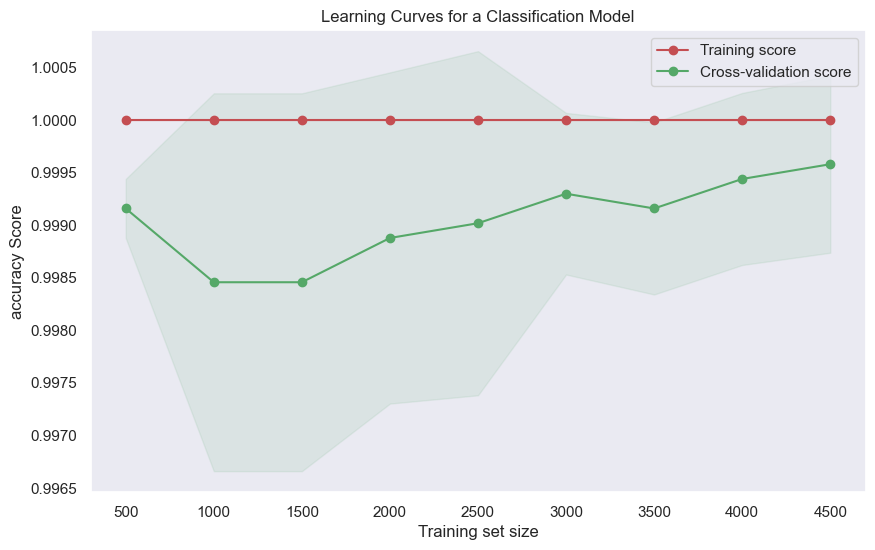

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725596512311, 'Precision': 0.9996728763327289, 'Recall': 0.9996725605762934, 'confusion_matrix': array([[1036,    0,    0],
       [   0,  993,    0],
       [   1,    0, 1024]], dtype=int64)}


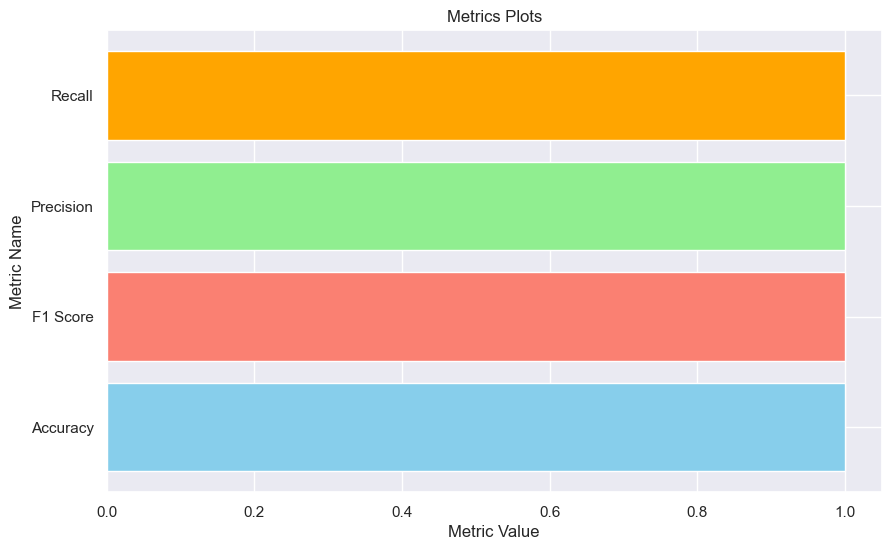

                    /*************************************\                   


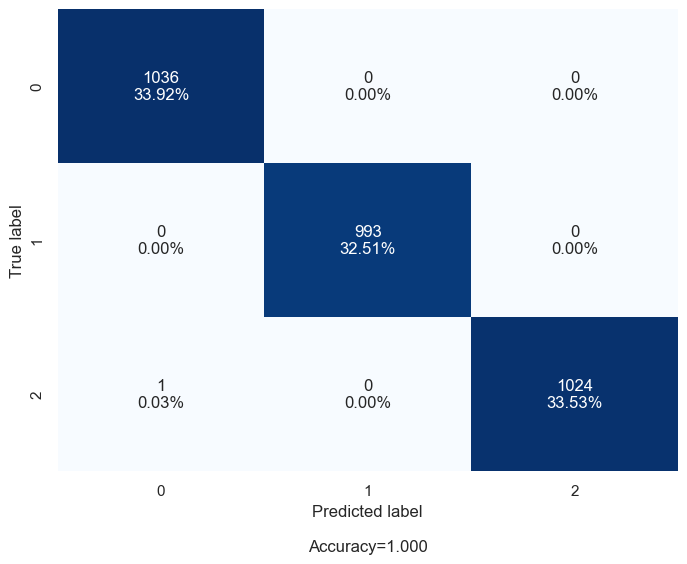

                    /*************************************\                   
                    /*************************************



In [19]:
 
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [int(x) for x in np.linspace(10, 1000,10)],
               'min_samples_split': [2, 5, 10,14],
               'min_samples_leaf': [1, 2, 4,6,8],
              'criterion':['entropy','gini']}
print(random_grid)
best_params=modeling(RandomForestClassifier,X_sampled,y_sampled,random_grid)

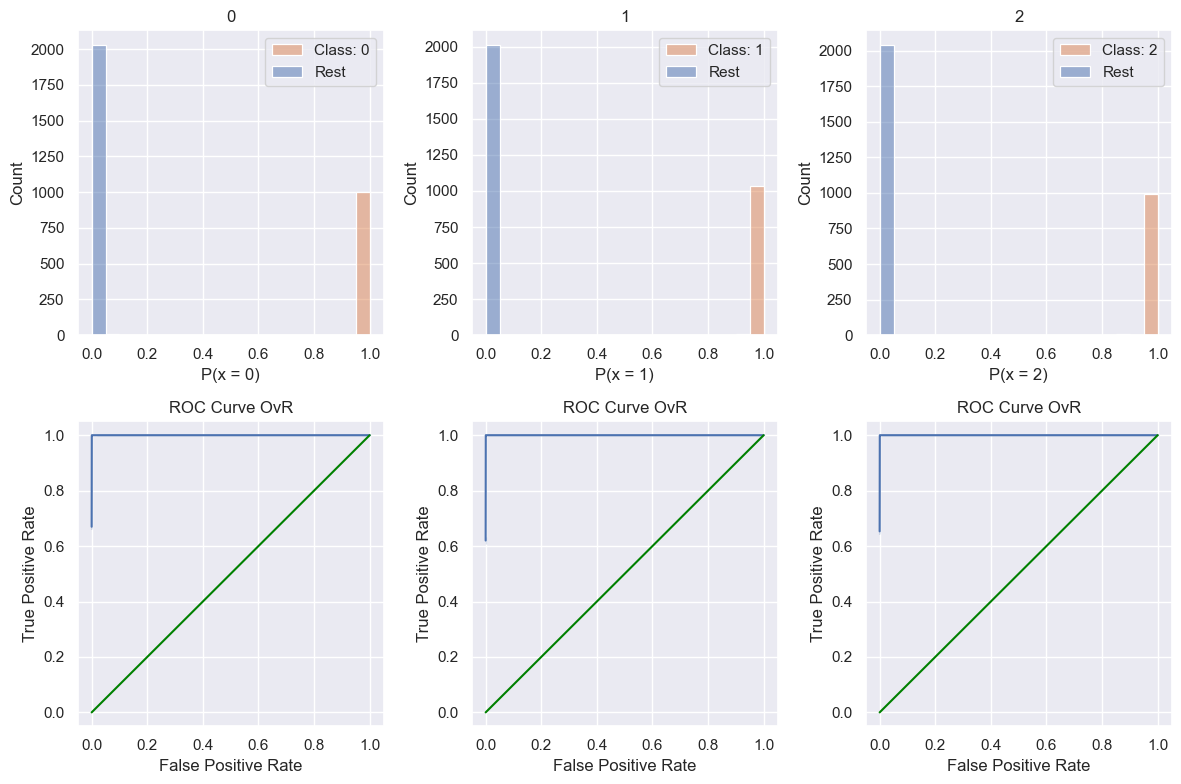

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=RandomForestClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Service_score')

In [21]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
print(metric_dic)
if 'RandomForestClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['RandomForestClassifier']=metric_dic

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725608189527, 'Precision': 0.9996728863866653, 'Recall': 0.9996725605762934}


###    3) Gradient Boosting Classifier:

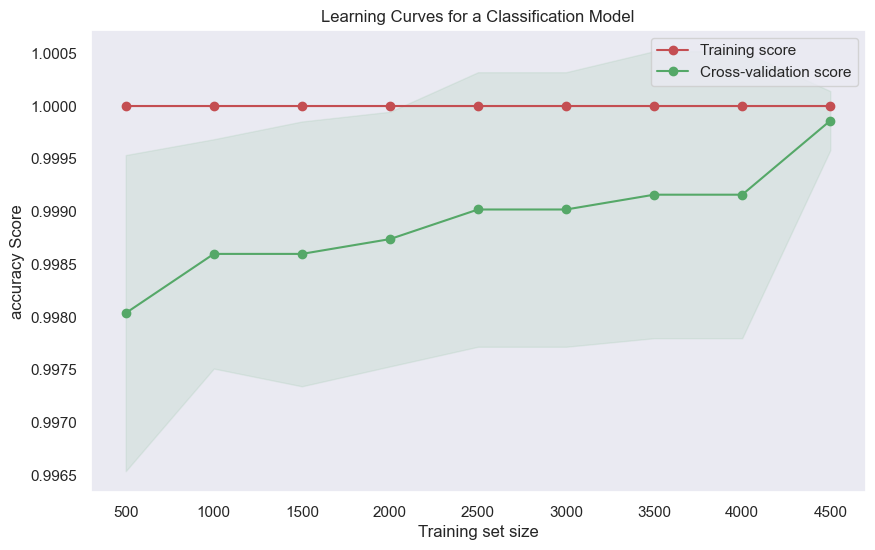

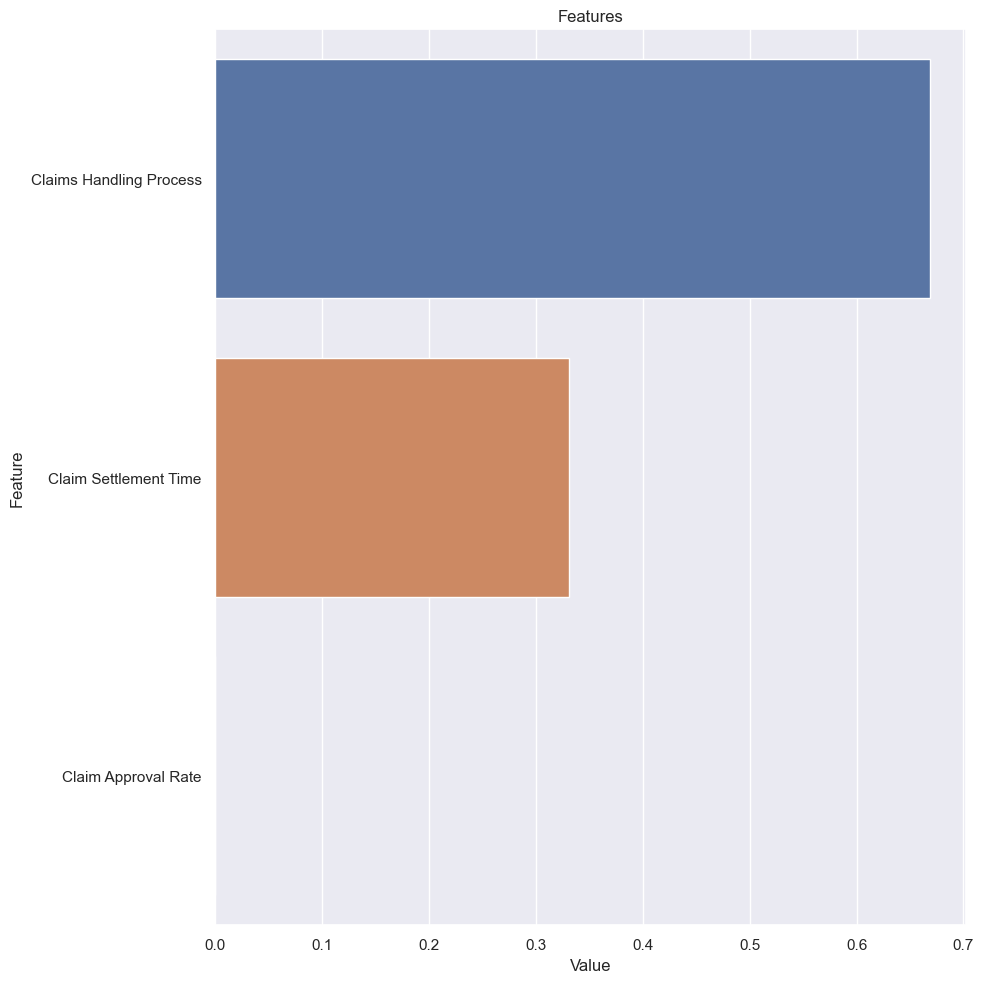

{'Accuracy': 0.9990176817288802, 'F1 Score': 0.9990177175841627, 'Precision': 0.9990206286836936, 'Recall': 0.9990176817288802, 'confusion_matrix': array([[ 997,    0,    0],
       [   0, 1006,    0],
       [   3,    0, 1048]], dtype=int64)}


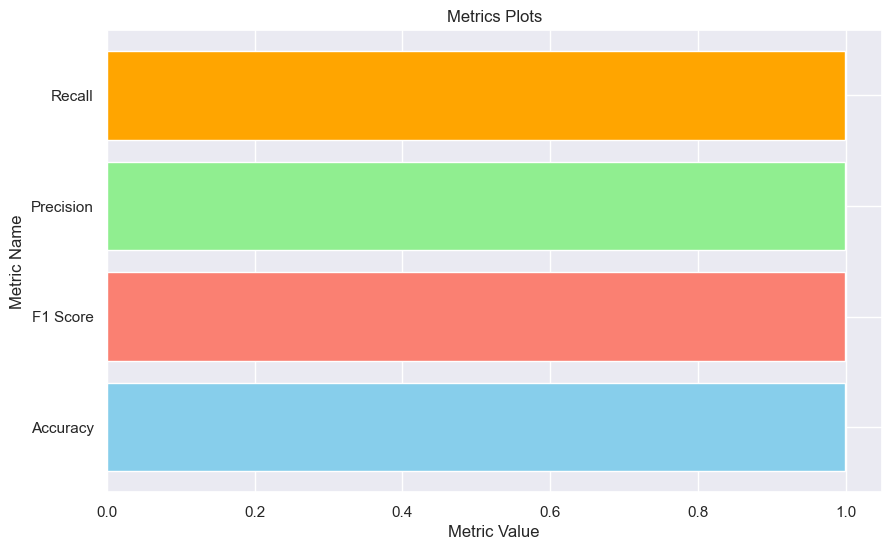

                    /*************************************\                   


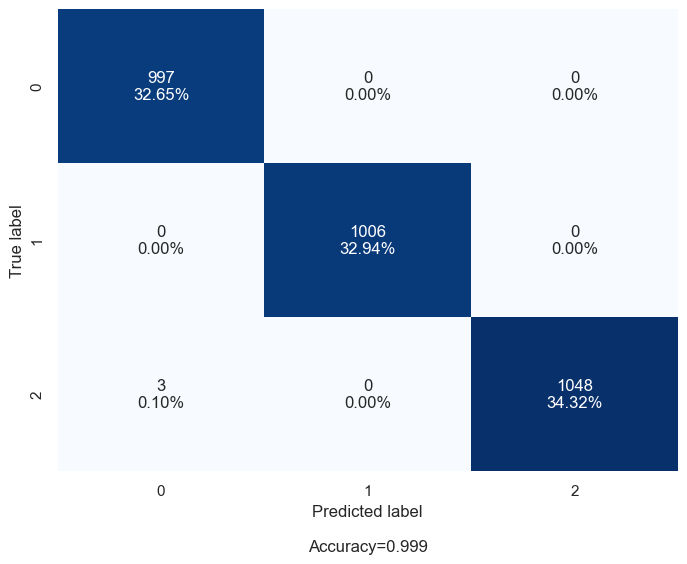

                    /*************************************\                   
Fitting 3 folds for each of 100 candidates, totalling 300 fits




*****************  Random  **************************

Best Params=  {'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1366666666666667}


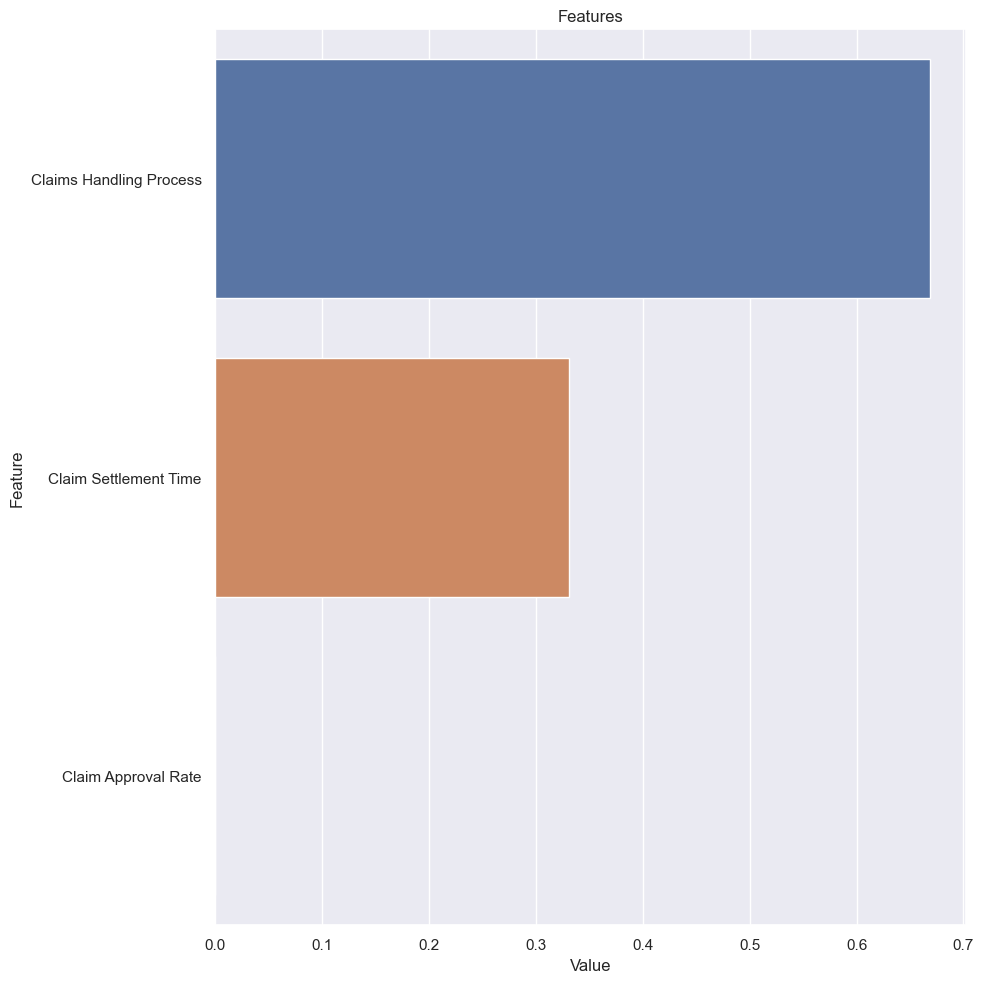

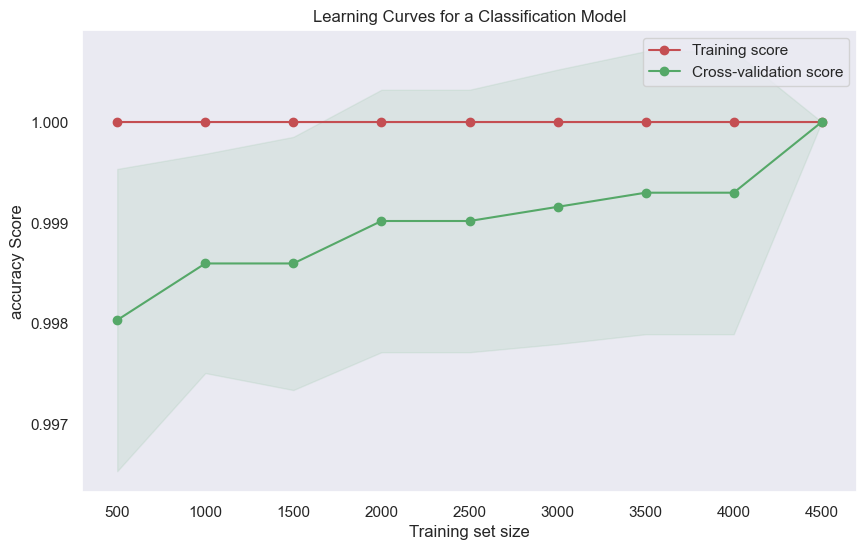

{'Accuracy': 0.9996725605762934, 'F1 Score': 0.9996725647166512, 'Precision': 0.9996728886719084, 'Recall': 0.9996725605762934, 'confusion_matrix': array([[ 997,    0,    0],
       [   0, 1006,    0],
       [   1,    0, 1050]], dtype=int64)}


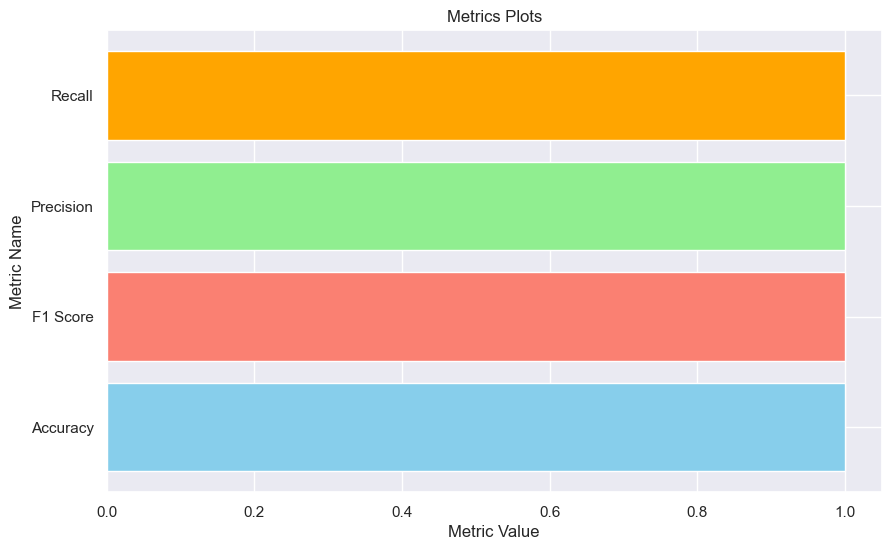

                    /*************************************\                   


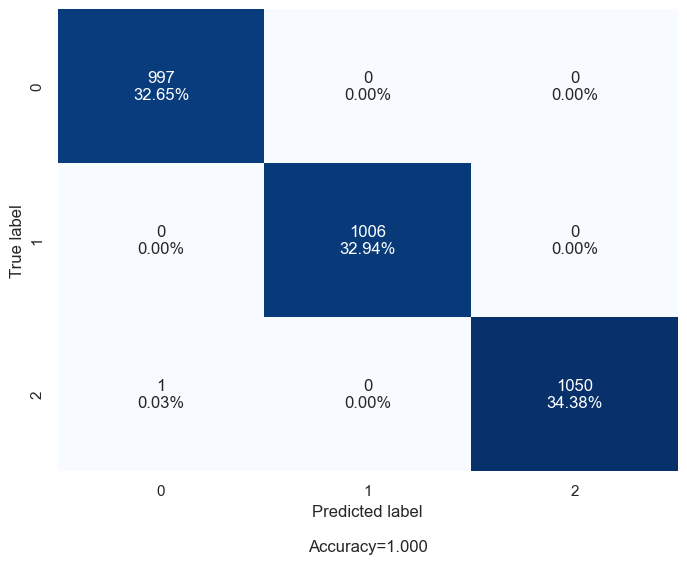

                    /*************************************\                   
                    /*************************************



In [22]:
random_grid = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
best_params=modeling(GradientBoostingClassifier,X_sampled,y_sampled,random_grid)

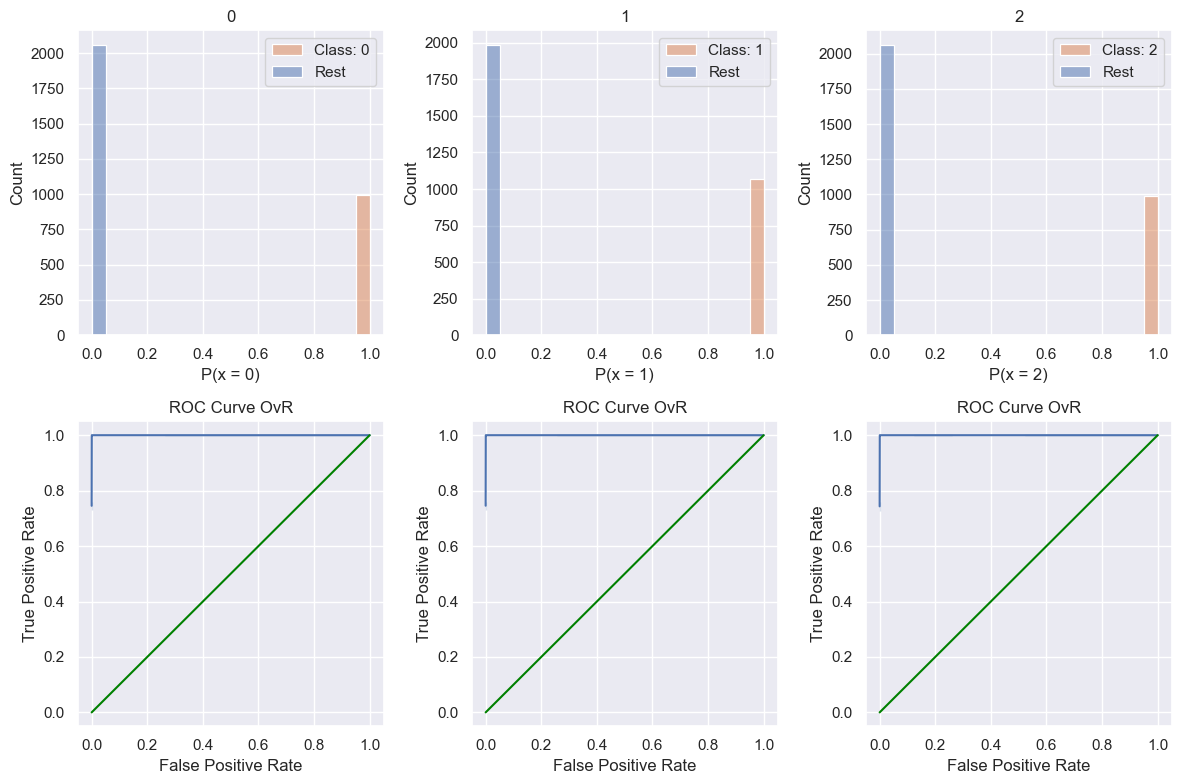

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
best_model=GradientBoostingClassifier(**best_params)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
y_proba=best_model.predict_proba(X_test)
ROC_multi_class(best_model,y_pred,y_proba,X_test,y_test,'Service_score')

In [24]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'GradientBoostingClassifier' not in liste_models_metrics.keys():
    liste_models_metrics['GradientBoostingClassifier']=metric_dic

### 4) Support Vector Classifier (SVC)

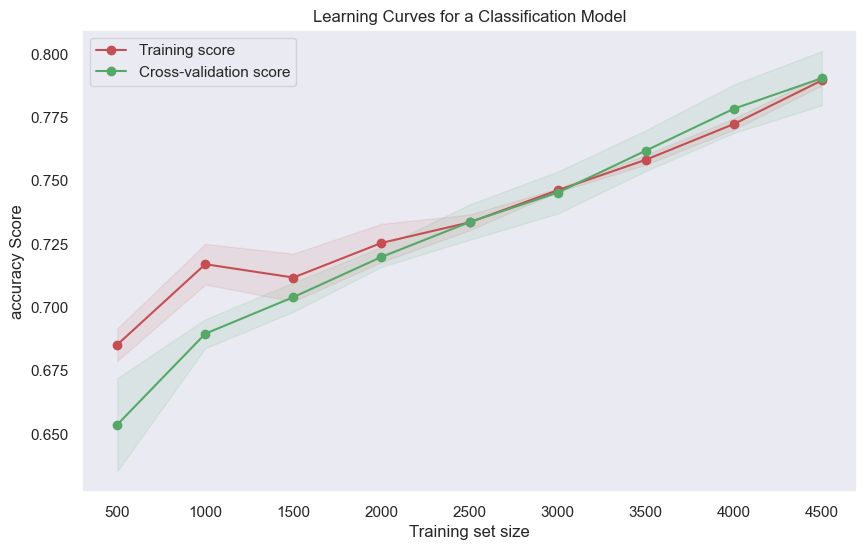

{'Accuracy': 0.8873608382449247, 'F1 Score': 0.8820519714222868, 'Precision': 0.8944270297836772, 'Recall': 0.8873608382449247, 'confusion_matrix': array([[1018,   19,    0],
       [ 157,  685,  148],
       [   2,   18, 1007]], dtype=int64)}


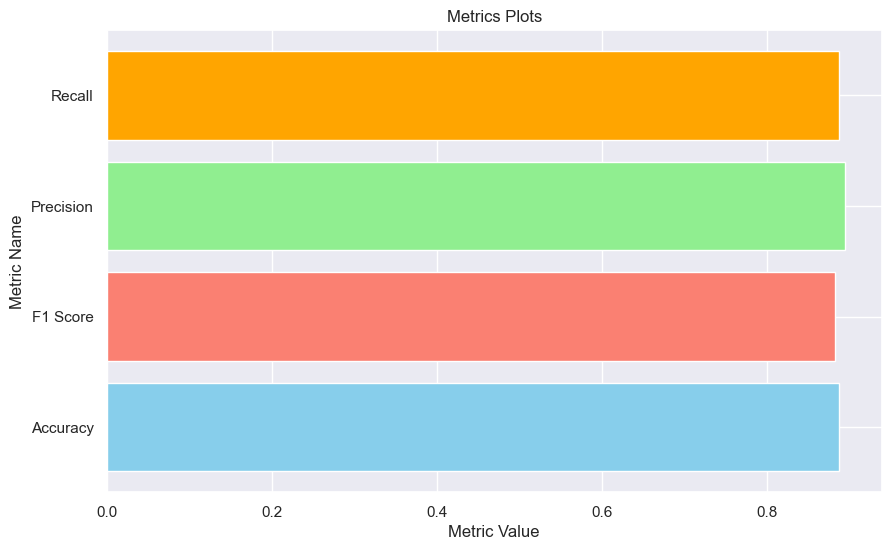

                    /*************************************\                   


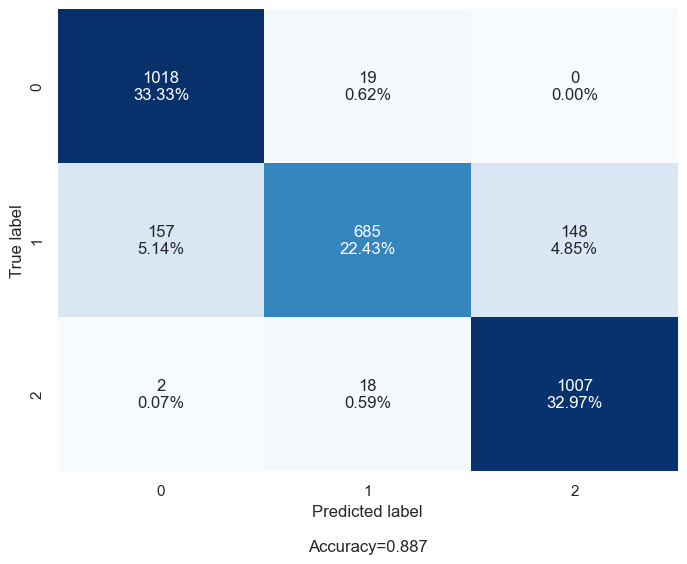

                    /*************************************\                   
Fitting 3 folds for each of 16 candidates, totalling 48 fits




*****************  Random  **************************

Best Params=  {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}


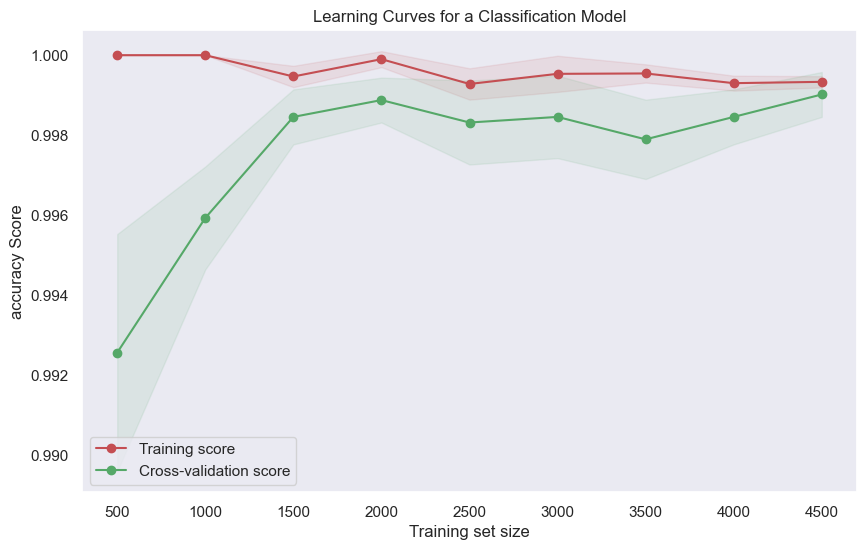

{'Accuracy': 1.0, 'F1 Score': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'confusion_matrix': array([[1037,    0,    0],
       [   0,  990,    0],
       [   0,    0, 1027]], dtype=int64)}


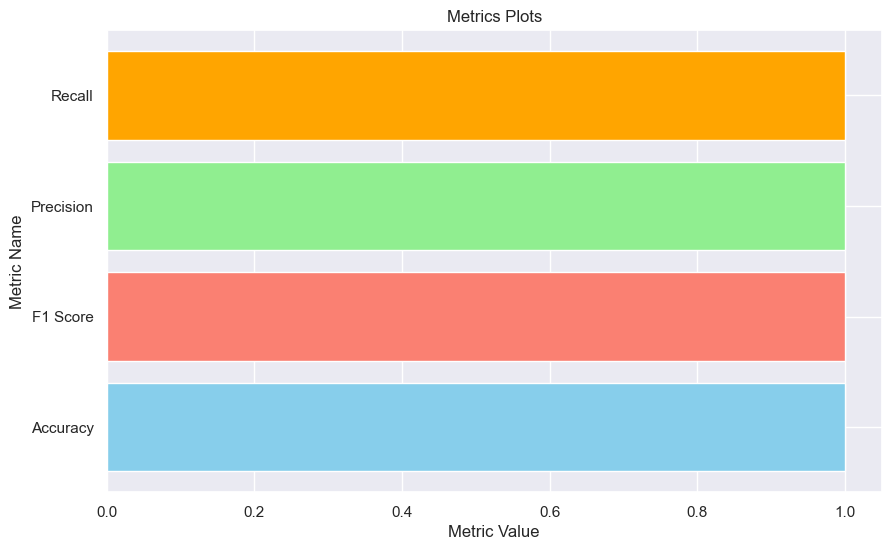

                    /*************************************\                   


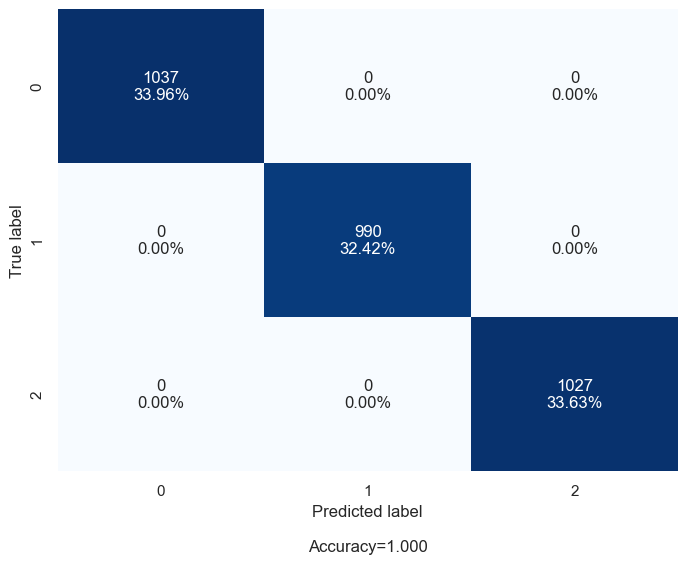

                    /*************************************\                   
                    /*************************************



In [25]:
random_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],'kernel':['rbf']}

best_params=modeling(SVC,X_sampled,y_sampled,random_grid,proba=False)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
SVC_model=SVC(**{'kernel': 'rbf', 'gamma': 0.01, 'C': 100})
SVC_model.fit(X_train,y_train)
y_pred=SVC_model.predict(X_test)


In [10]:
metric_dic=get_metrics(y_pred,y_test)
metric_dic.pop('confusion_matrix')
if 'SVM' not in liste_models_metrics.keys():
    liste_models_metrics['SVM']=metric_dic

# III) Model Comparison:

Accuracy : dict_values([1.0, 1.0, 1.0, 1.0])
F1 Score : dict_values([0.9996725605762934, 0.9996725608189527, 0.9996728863866653, 0.9996725605762934])
Precision : dict_values([1.0, 1.0, 1.0, 1.0])
Recall : dict_values([0.9993451211525868, 0.9993451211525868, 0.9993451211525868, 0.9993451211525868])


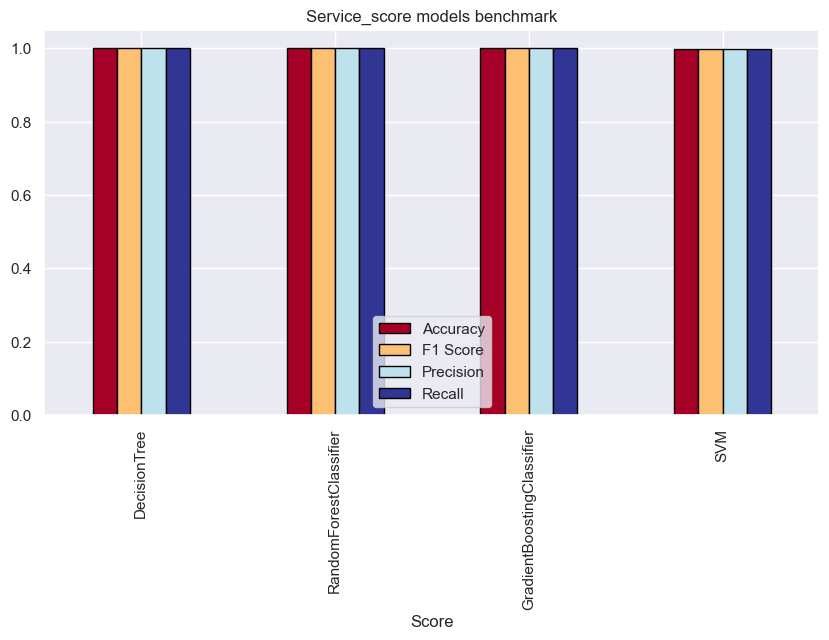

In [28]:
model_comparasion(list(liste_models_metrics.values()),list(liste_models_metrics.keys()),'Service_score')

## Conclusion:

* After comparing the performance of all models used, it is evident that SVC outperforms every other model across all evaluation metrics. Additionally, Random Forest exhibits a very reasonable learning curve, indicating stable and consistent performance with increasing training data. Therefore, based on these findings, Random Forest is the preferred choice for the classification task at hand.

# Save model

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_sampled,y_sampled, test_size=0.3)
SVC_model=SVC(**{'kernel': 'rbf', 'gamma': 0.01, 'C': 100})
SVC_model.fit(X_train.to_numpy(),y_train.to_numpy())
y_pred=SVC_model.predict(X_test.to_numpy())

In [11]:
# Create new folder

directory = "Service_Classification_models"
  
# Parent Directory path 
import joblib

# Path 
models_directory=parent_dir+'\models'
path = os.path.join(models_directory, directory) 
try:
    os.mkdir(path)
except Exception as e:
    print(e.args[1])
    pass
print(path)
# save Scaler
joblib.dump(scaled, path+'\Service_Classification_scaler.joblib')
# Save Model
joblib.dump(SVC_model, path+'\Service_Classification_model.joblib')
# Save Features
df.dtypes.to_pickle(path+'\Service_Classification_Features.pkl')

C:\Users\Haboubi\PFE2\classification\models\Service_Classification_models


## Add model/scaler into the table models in Postgres sql 

In [ ]:
import psycopg2
import pickle
db_config = {
    'dbname': 'postgres',
    'user': 'admin',
    'password': 'admin',
    'host': 'localhost',  
    'port': '5432'  
}



model_name="Service_Classification_model"
scaler_name="Service_Classification_scaler"
model_blob = pickle.dumps(SVC_model)
scaled_blob=pickle.dumps(scaled)

In [ ]:
try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(**db_config)
    cursor = conn.cursor()

   
    # Insert the model into the table
    insert_model_query = """
    INSERT INTO model_storage (model_name, model_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_model_query, (model_name, model_blob))
    conn.commit()

    # Insert the scaler into the table
    insert_scaler_query = """
    INSERT INTO scalers_storage (scaled_name, scaled_data)
    VALUES (%s, %s);
    """
    cursor.execute(insert_scaler_query, (scaler_name, scaled_blob))
    conn.commit()
    print("scaler saved to PostgreSQL successfully!")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if conn:
        conn.close()